# Import datasets 

In [112]:
#Import all the necessary modules
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import pandas_profiling

In [114]:
df1 = pd.read_csv("frequency_domain_features_train .csv")
df2 = pd.read_csv("heart_rate_non_linear_features_train.csv")
df3 = pd.read_csv("time_domain_features_train.csv")

In [115]:
df1.shape, df2.shape, df3.shape

((369289, 12), (369289, 7), (369289, 20))

In [116]:
df4 = df1.merge(right=df2,how='inner',on='uuid')

In [117]:
df4.shape

(369289, 18)

In [118]:
df5 = df4.merge(right=df3,how='inner',on='uuid')

In [119]:
df5.shape

(369289, 37)

In [120]:
df5.condition.nunique()

3

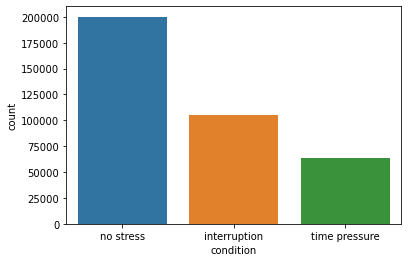

In [121]:
sns.countplot(df5["condition"])

In [122]:
conditions = [
    (df5['condition'] == "no stress"),
    (df5['condition'] == "interruption condition"),
    (df5['condition'] == "time pressure" )
    ]

In [123]:
values = [1,0,-1]

In [124]:
df5['condition2'] = np.select(conditions, values)

In [125]:
df6 = pd.read_csv("frequency_domain_features_test.csv")
df7 = pd.read_csv("heart_rate_non_linear_features_test.csv")
df8 = pd.read_csv("time_domain_features_test.csv")

In [126]:
df6.shape, df7.shape, df8.shape

((41033, 12), (41033, 7), (41033, 19))

In [127]:
df9 = df6.merge(right=df7,how='inner',on='uuid')
df10 = df9.merge(right=df8,how='inner',on='uuid')

In [128]:
conditions = [
    (df10['condition'] == "no stress"),
    (df10['condition'] == "interruption condition"),
    (df10['condition'] == "time pressure" )
    ]

In [129]:
values = [1,0,-1]

In [130]:
df10['condition2'] = np.select(conditions, values)

In [131]:
df10.shape

(41033, 37)

## Make uuid Index

df11=train
df12=test

In [147]:
df11 = df5.set_index('uuid')
df12 = df10.set_index('uuid')

### Features to drop

In [154]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor

In [155]:
# newly defined features
dftest = df12.drop(['condition','datasetId','SD2','SDRR_RMSSD_REL_RR',
                     'SDRR_REL_RR','MEAN_REL_RR','condition2','RMSSD_REL_RR',
                     'MEDIAN_REL_RR','RMSSD','LF_PCT','SKEW_REL_RR','HF','LF_NU',"HF_NU"
                    ,"SD1",'VLF','TP',"LF_HF","MEDIAN_RR","LF","VLF_PCT",
                    "KURT_REL_RR"], axis = 1)

dftrain = df11.drop(['condition','datasetId','SD2','SDRR_RMSSD_REL_RR',
                     'SDRR_REL_RR','MEAN_REL_RR','condition2','RMSSD_REL_RR',
                     'MEDIAN_REL_RR','RMSSD','LF_PCT','SKEW_REL_RR','HF','LF_NU',"HF_NU"
                    ,"SD1",'VLF','TP',"LF_HF","MEDIAN_RR","LF","VLF_PCT",
                    "KURT_REL_RR"], axis=1)

In [156]:
X = dftrain.drop("HR",axis=1)
y = dftrain["HR"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=1)

Random foresrt

In [157]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(random_state=1, n_estimators=2, max_depth=2)
rf.fit(X_train,y_train)
#rf.score(X_train,y_train)
y_pred_rf_train=rf.predict(X_train)
y_pred_rf_val=rf.predict(X_val)
print('Train R2 score: ', r2_score(y_train,y_pred_rf_train))
print('Validation R2 score: ', r2_score(y_val,y_pred_rf_val))

Train R2 score:  0.8461282435792761
Validation R2 score:  0.847760642532209


In [158]:
rmse_rf = np.sqrt(mean_squared_error(y_val, y_pred_rf_val))
mse_rf = mean_squared_error(y_val, y_pred_rf_val)
mae_rf = mean_absolute_error(y_val, y_pred_rf_val)
r2_rf = r2_score(y_val, y_pred_rf_val)
adjr2_rf = 1-(1-r2_rf)*(len(y_val)-1)/(len(y_val)-len(X_val.columns)-1)

resultsDf1 = pd.DataFrame({'Method':['Random Forest Validation'], 'RMSE': rmse_rf , 'MSE': mse_rf , 'MAE': mae_rf ,"R2": r2_rf, 'Adj_R2': adjr2_rf})
resultsDf1

,Method,RMSE,MSE,MAE,R2,Adj_R2
0,Random Forest Validation,4.016635,16.133357,3.233378,0.847761,0.847707


In [159]:
rmse_rf = np.sqrt(mean_squared_error(y_train, y_pred_rf_train))
mse_rf = mean_squared_error(y_train, y_pred_rf_train)
mae_rf = mean_absolute_error(y_train, y_pred_rf_train)
r2_rf = r2_score(y_train, y_pred_rf_train)
adjr2_rf = 1-(1-r2_rf)*(len(y_train)-1)/(len(y_train)-len(X_train.columns)-1)

resultsDf1 = pd.DataFrame({'Method':['Random Forest Train'], 'RMSE': rmse_rf , 'MSE': mse_rf , 'MAE': mae_rf ,"R2": r2_rf, 'Adj_R2': adjr2_rf})
resultsDf1

,Method,RMSE,MSE,MAE,R2,Adj_R2
0,Random Forest Train,4.056885,16.458312,3.260154,0.846128,0.846122


## Dataframe of predicted vs actual HR

In [160]:
pred_vs_actual = pd.DataFrame(y_val)
pred_vs_actual['predictedHR_RF'] = y_pred_rf_val
pred_vs_actual

,HR,predictedHR_RF
uuid,,
80ffbdb6-9cee-44b7-91b3-cf26ac25e5d5,67.923866,69.346895
eb61e4c8-c28f-4087-82b8-b427a5a52bef,76.960355,79.549592
80f5f9e2-a85d-4a51-8b89-39505b206ccf,76.086628,79.549592
c81a3c50-ee66-459a-9d55-a8261093c724,74.739285,79.549592
21eef6fc-3b7d-4ec7-a07e-202ca0075a4d,92.082130,96.580064
...,...,...
9d09efd1-8c82-4d48-9615-ba7d980635a2,56.797168,60.246170
f5f36380-eeeb-40c6-9d23-c23d253a3266,70.558553,69.346895
d219e619-cca3-4617-b297-ea2a06fac092,79.060016,79.549592


In [161]:
dftrain.columns

Index(['HF_PCT', 'HF_LF', 'sampen', 'higuci', 'MEAN_RR', 'SDRR', 'SDSD',
       'SDRR_RMSSD', 'HR', 'pNN25', 'pNN50', 'KURT', 'SKEW', 'SDSD_REL_RR'],
      dtype='object')

In [162]:
dftest.columns

Index(['HF_PCT', 'HF_LF', 'sampen', 'higuci', 'MEAN_RR', 'SDRR', 'SDSD',
       'SDRR_RMSSD', 'pNN25', 'pNN50', 'KURT', 'SKEW', 'SDSD_REL_RR'],
      dtype='object')

# Preform on test data

In [163]:
y_pred_rf_test=rf.predict(dftest)

In [164]:
pred_test = pd.DataFrame(dftest)
pred_test['HR'] = y_pred_rf_test


In [165]:
pred_test.columns

Index(['HF_PCT', 'HF_LF', 'sampen', 'higuci', 'MEAN_RR', 'SDRR', 'SDSD',
       'SDRR_RMSSD', 'pNN25', 'pNN50', 'KURT', 'SKEW', 'SDSD_REL_RR', 'HR'],
      dtype='object')

In [167]:
Submission_yhats = pred_test.drop(['HF_PCT', 'HF_LF', 'sampen', 'higuci', 'MEAN_RR', 'SDRR', 'SDSD',
       'SDRR_RMSSD', 'pNN25', 'pNN50', 'KURT', 'SKEW', 'SDSD_REL_RR'], axis=1)

# First Submission

In [168]:
Submission_yhats

,HR
uuid,
62b75db5-bc40-4c8f-9166-daf0efcab4c2,69.346895
a99549ad-3eb6-4413-bc90-9053e7f7e684,79.549592
cb573d3a-c767-4556-b32e-ad8c08ded214,69.346895
47a0c6de-2aef-4ac3-997d-252fa6fd07f1,60.246170
de3fd54f-c74e-4fe8-bf2a-7a127f68b312,79.549592
...,...
11253232-cf0a-4c40-abfb-ac2795effd9b,79.549592
38052c36-d08d-4305-905b-830f600ce2b9,96.580064
8ef3781b-512f-42ce-bcfd-47f5c1070bb0,60.246170


In [526]:
Submission_yhats.to_csv ('submission19.csv', index = True, header=True)